## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Read data set

In [2]:
data = pd.read_csv('D:/ML/DataSets/unsupervised/clustering/Customer_Data.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
columns, rows = data.shape
[columns, rows]

[8950, 18]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
data.duplicated().sum()

0

# Show details of Nan values 
#### <li style="color:red;"> MINIMUM_PAYMENTS = 313 </li>
               

In [9]:
data[data['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


#### <li style="color:red"> CREDIT_LIMIT = 1 </li>      

In [10]:
data[data['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [11]:
data.dropna(inplace=True)
data.drop(['CUST_ID'],axis=1,inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [12]:
columns = np.delete(data.columns, np.where( data.columns =='PURCHASES')) # delete PURCHASES column from list of columns due to it is a target

In [13]:
data_sorted = data.sort_values(by='PURCHASES')
data_sorted

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5973,2705.899439,1.000000,0.00,0.00,0.00,547.055908,0.000000,0.000000,0.000000,0.166667,2,0,8500.0,1123.974128,654.870661,0.000000,12
5423,5965.535557,1.000000,0.00,0.00,0.00,419.177619,0.000000,0.000000,0.000000,0.583333,7,0,6000.0,1495.067426,2221.880048,0.000000,12
5422,6958.239974,1.000000,0.00,0.00,0.00,3482.699506,0.000000,0.000000,0.000000,0.166667,2,0,7500.0,3688.217452,1752.657115,0.000000,12
5415,239.446482,0.636364,0.00,0.00,0.00,698.096182,0.000000,0.000000,0.000000,0.250000,8,0,2000.0,351.850485,181.339692,0.166667,12
5414,216.716507,1.000000,0.00,0.00,0.00,810.792285,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,1308.537026,94.707440,0.250000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2997.977825,1.000000,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.665220,767.014180,0.750000,12
1604,3391.702180,1.000000,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.625930,716.027656,1.000000,12
1256,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.727850,703.503256,1.000000,12
501,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.750680,15914.484620,0.083333,12


In [14]:
customer_without_purchese = data_sorted[data_sorted['PURCHASES']== 0.00]
customer_without_purchese

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5973,2705.899439,1.000000,0.0,0.0,0.0,547.055908,0.0,0.0,0.0,0.166667,2,0,8500.0,1123.974128,654.870661,0.000000,12
5423,5965.535557,1.000000,0.0,0.0,0.0,419.177619,0.0,0.0,0.0,0.583333,7,0,6000.0,1495.067426,2221.880048,0.000000,12
5422,6958.239974,1.000000,0.0,0.0,0.0,3482.699506,0.0,0.0,0.0,0.166667,2,0,7500.0,3688.217452,1752.657115,0.000000,12
5415,239.446482,0.636364,0.0,0.0,0.0,698.096182,0.0,0.0,0.0,0.250000,8,0,2000.0,351.850485,181.339692,0.166667,12
5414,216.716507,1.000000,0.0,0.0,0.0,810.792285,0.0,0.0,0.0,0.250000,3,0,1800.0,1308.537026,94.707440,0.250000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,54.567517,1.000000,0.0,0.0,0.0,207.390596,0.0,0.0,0.0,0.166667,4,0,3000.0,276.975673,161.150923,0.250000,12
8410,789.814537,0.909091,0.0,0.0,0.0,5654.928930,0.0,0.0,0.0,0.166667,12,0,3000.0,5949.858363,475.195844,0.090909,12
8791,218.890208,0.600000,0.0,0.0,0.0,447.102858,0.0,0.0,0.0,0.300000,4,0,500.0,58.883172,166.541878,0.000000,10
8789,857.273285,1.000000,0.0,0.0,0.0,862.389125,0.0,0.0,0.0,0.100000,1,0,1000.0,93.209082,332.643584,0.000000,10


# Visualization

# <li style ="color:green">Correlation Between Features </li>

<AxesSubplot:>

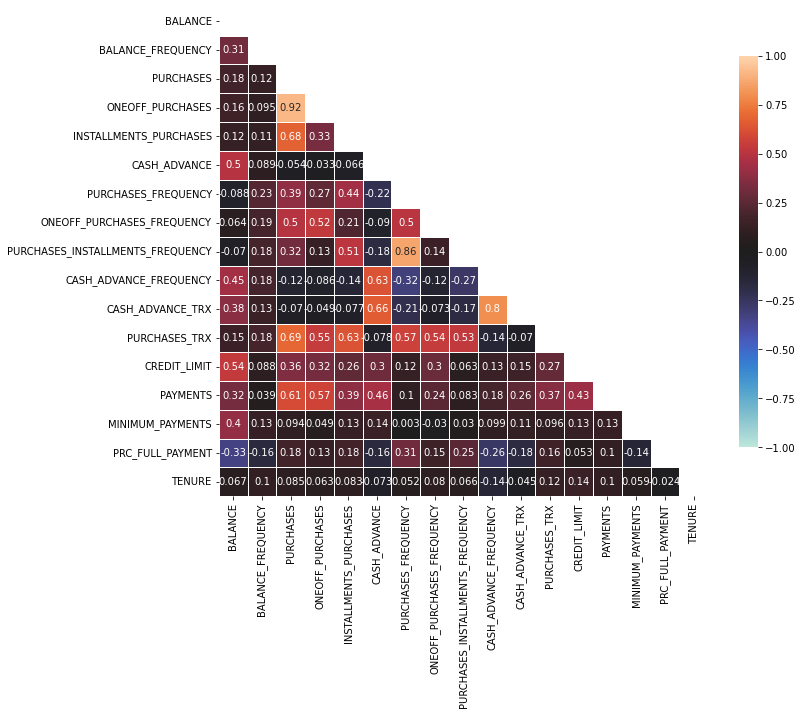

In [17]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(50, 200, as_cmap=True)

sns.heatmap(data.corr(), mask=mask, vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.9, cbar_kws={"shrink": .8})

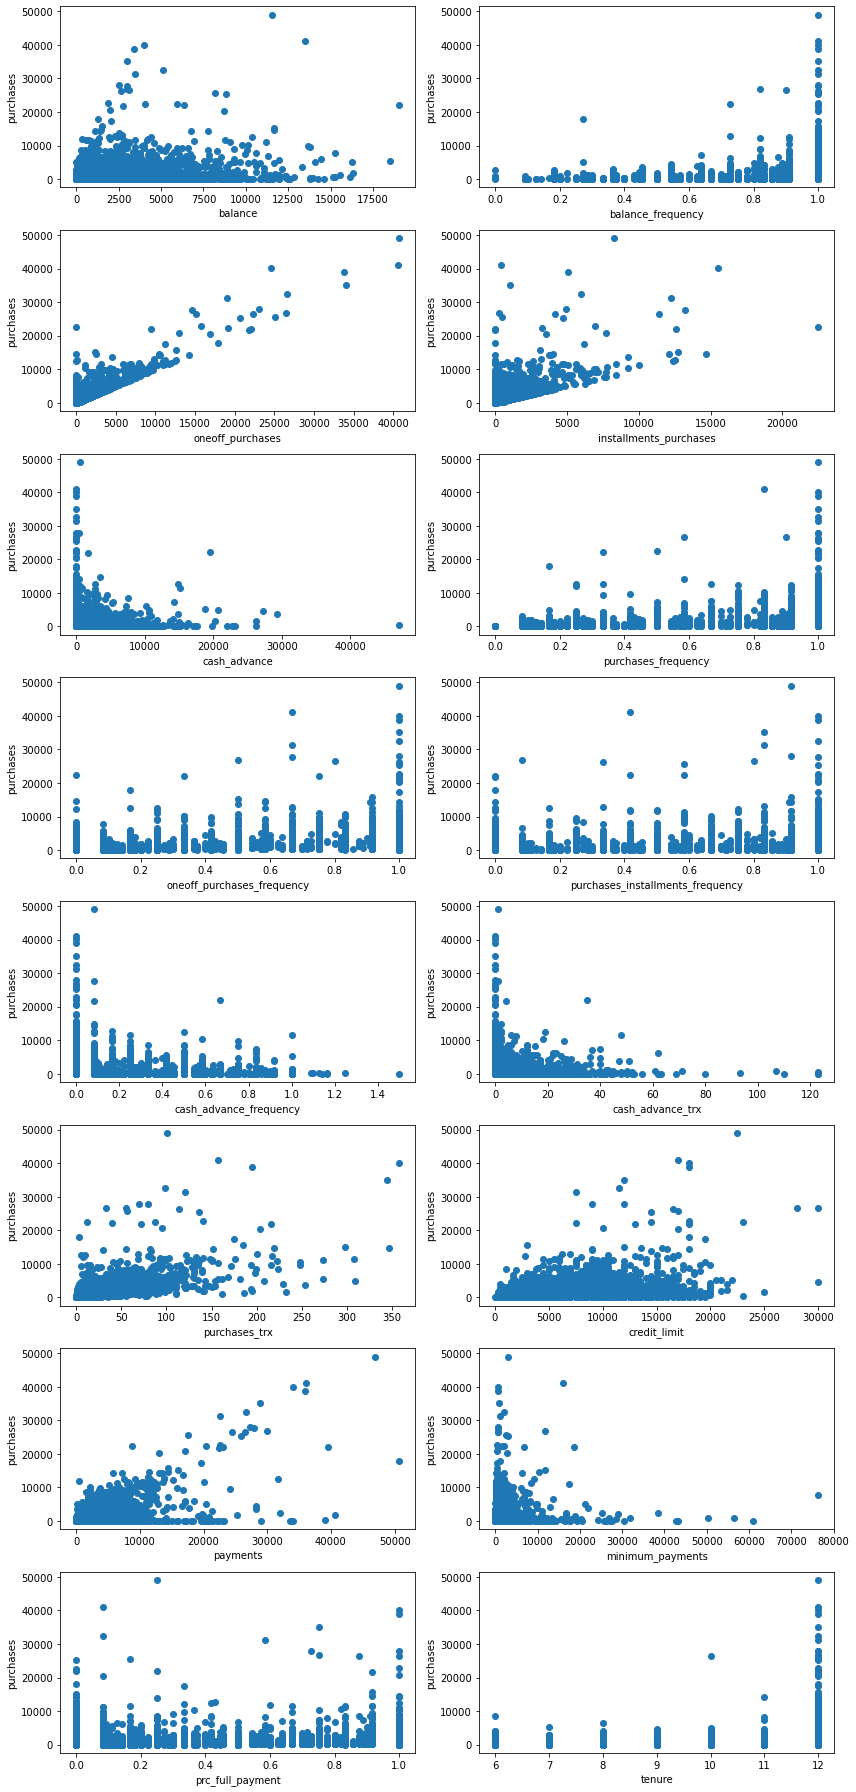

In [16]:

fig, ax = plt.subplots(int(len(columns)/2), 2, figsize=(12, 25))

for index, column in enumerate(columns):
    row = index // 2
    col_num = index % 2

    ax[row, col_num].scatter(data[column], data['PURCHASES'])
    ax[row, col_num].set_xlabel(column.lower())
    ax[row, col_num].set_ylabel('purchases')

plt.tight_layout()
plt.show()

    

In [17]:
#!pip install kneed

In [18]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [19]:
df = pd.DataFrame(data)

In [40]:
def Draw_KMeans(df, k):
    k_means = []
    for i in range(2,k):
        # init = 'random'
        model = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state = 42)
        model.fit(df)
        k_means.append(model.inertia_)   

    k_need = KneeLocator(range(2,k), k_means, curve="convex", direction="decreasing")
    # Draw Plot
    plt.figure(figsize=(15,8))
    plt.plot(range(2,k),k_means)
    plt.xticks(range(2,k))
    plt.xlabel('The Number Of Clusters')
    plt.ylabel('Inertia')
    plt.title('Clusters Vs Inertia')
    plt.grid()
    plt.axvline(x=k_need.elbow, color='r', ls="--")
    plt.show()
    
    return k_need.elbow

# Clustering 

### Normalizing

In [160]:
df_new = pd.DataFrame(df,columns=['BALANCE','PURCHASES'])

In [161]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_new)

## K-Means

## <li style="color:gray"> clustering by Balance column</li>

  <li style="color:green"> This function find <b>K</b> for K-means fuction </li>

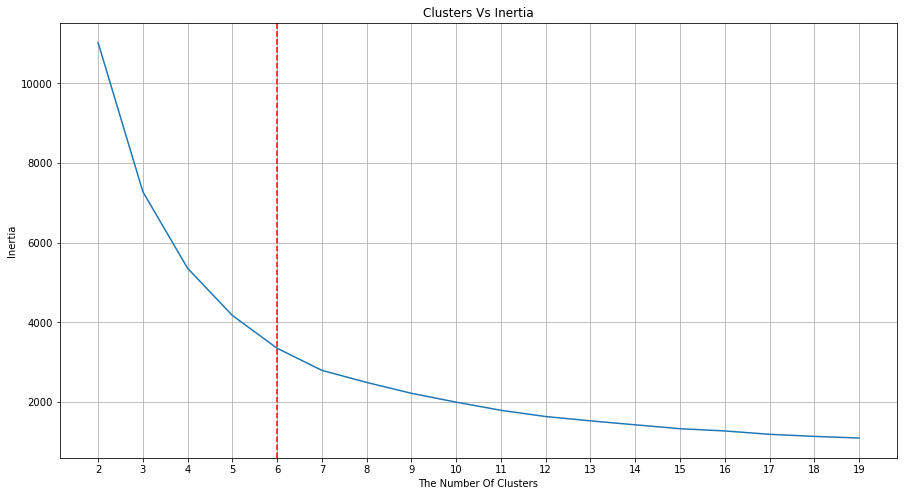

In [63]:
K = Draw_KMeans(scaled_features, 20)

In [162]:
kmeans = KMeans(n_clusters= K, init='random', random_state=42) # init = random OR k-means++

In [163]:
y_predict = kmeans.fit_predict(df_new)
# y_predict = kmeans.fit_predict(scaled_features)

###  Add [ y_predict ] to df_new data frame

In [164]:
df_new['Cluster'] = y_predict
df_new

,BALANCE,PURCHASES,Cluster
0,40.900749,95.40,0
1,3202.467416,0.00,4
2,2495.148862,773.17,4
4,817.714335,16.00,0
5,1809.828751,1333.28,0
...,...,...,...
8943,5.871712,20.90,0
8945,28.493517,291.12,0
8947,23.398673,144.40,0
8948,13.457564,0.00,0


###  Change type of [ Cluster ] to [ category ]

In [165]:
df_new['Cluster'] = df_new['Cluster'].astype('category')
type(df_new['Cluster'])

pandas.core.series.Series

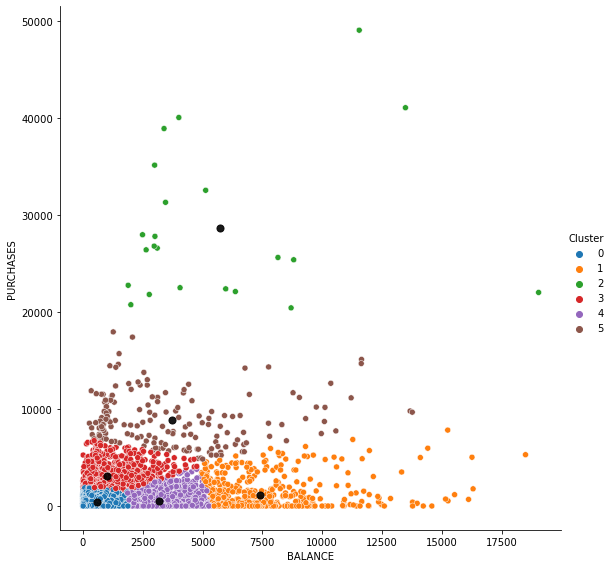

In [166]:
sns.relplot(x="BALANCE", y="PURCHASES", hue="Cluster", data=df_new, height=8);
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=50, marker="o",label="centroids",alpha=0.9)


# Clustering after normalizing data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()

In [136]:
df_normalized =  pd.DataFrame(df,columns=['BALANCE','PURCHASES'])
df_normalized

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
4,817.714335,16.00
5,1809.828751,1333.28
...,...,...
8943,5.871712,20.90
8945,28.493517,291.12
8947,23.398673,144.40
8948,13.457564,0.00


In [143]:
df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized))
df_normalized

,0,1
0,-0.744625,-0.429184
1,0.764152,-0.473208
2,0.426602,-0.116413
3,-0.373910,-0.465825
4,0.099551,0.142062
...,...,...
8631,-0.761342,-0.463563
8632,-0.750546,-0.338865
8633,-0.752977,-0.406572
8634,-0.757721,-0.473208


### Rename Columns of normalized data frame

In [144]:
df_normalized.rename(columns={0:'BALANCE', 1:'PURCHASES'},inplace=True)
df_normalized

,BALANCE,PURCHASES
0,-0.744625,-0.429184
1,0.764152,-0.473208
2,0.426602,-0.116413
3,-0.373910,-0.465825
4,0.099551,0.142062
...,...,...
8631,-0.761342,-0.463563
8632,-0.750546,-0.338865
8633,-0.752977,-0.406572
8634,-0.757721,-0.473208


In [145]:
kmeans = KMeans(n_clusters= K, init='random', random_state=42)

In [146]:
prediction = kmeans.fit_predict(df_normalized)

In [149]:
df_normalized['Cluster'] = prediction
df_normalized

,BALANCE,PURCHASES,Cluster
0,-0.744625,-0.429184,0
1,0.764152,-0.473208,4
2,0.426602,-0.116413,4
3,-0.373910,-0.465825,0
4,0.099551,0.142062,0
...,...,...,...
8631,-0.761342,-0.463563,0
8632,-0.750546,-0.338865,0
8633,-0.752977,-0.406572,0
8634,-0.757721,-0.473208,0


In [150]:
type(df_normalized['Cluster'])

pandas.core.series.Series

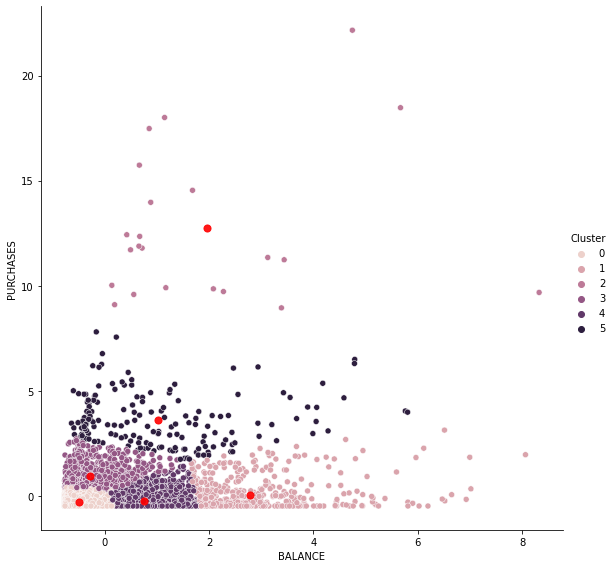

In [158]:
sns.relplot(x="BALANCE", y="PURCHASES", hue="Cluster", data=df_normalized, height=8);
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=50, marker="o",label="centroids",alpha=0.9)


# AffinityPropagation

In [40]:
from sklearn.cluster import AffinityPropagation, MeanShift,DBSCAN

##### damping: It is the extent to which the current value is maintained relative to incoming values, by default it is 0.5
##### max_iter: It is the number of iteration we want to do
##### affinity: In this we have to choose between euclidean and precomputed.

In [42]:
# AF = AffinityPropagation(damping=0.5, max_iter=500, affinity="euclidean")
# AF.fit(scaled_features)

In [ ]:
# n_clusters_ = len(AF.cluster_centers_indices_)
# print("Number of Clusters: ",n_clusters_)

#### Predict model

In [44]:
# _y = model.predict(df)
# clusters = unique(_y)
# df['clusters'] = clusters

#### visualizing

In [ ]:
# fig = plt.figure(figsize=(10,10)); 
# ax = fig.add_subplot(20)
# scatter = ax.scatter(df[0], df[1], c=df["Cluster"], s=50)
# ax.set_title("AffinityPropagation Clustering")
# # ax.set_xlabel("X0"); 
# # ax.set_ylabel("X1")
# plt.colorbar(scatter);
# plt.show()

# Mean Shift

In [99]:
MS = MeanShift()

In [100]:
MS.fit(df_new)

MeanShift()

In [101]:
labels = MS.labels_

In [102]:
cluster_centers = MS.cluster_centers_

In [103]:
X = np.array(scaled_features)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


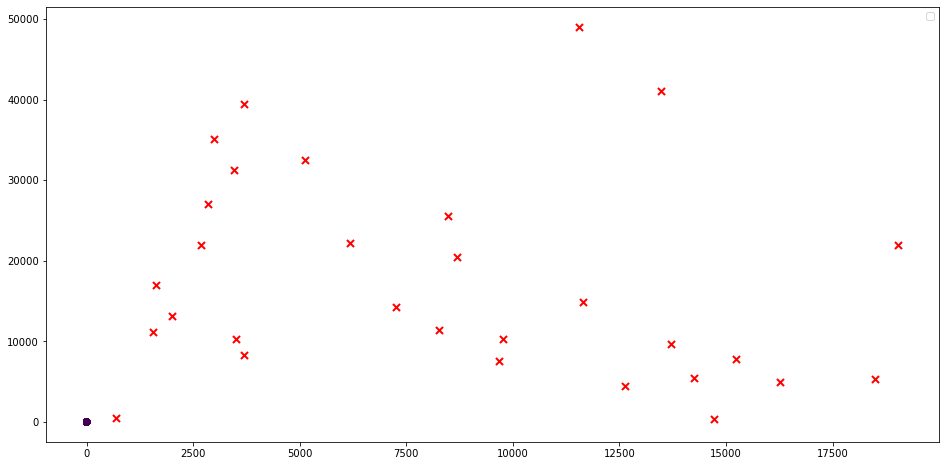

In [104]:
plt.figure(figsize=(16,8))
plt.scatter(X[:, 0], X[:, 1], marker ='o',c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           marker ='x', color ='red',
           s = 50, linewidth = 2, zorder = 10)
plt.legend()
plt.show()

# DBSCAN

### DBSCAN requires two parameters. the radius of neighborhoods for a given data point p (eps) and the minimum number of data points in a given neighborhood to form clusters (min_samples).
#### DBSCAN(eps=0.3, min_samples=10)

### Calculate eps (we use KNN)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [ ]:
nbrs = NearestNeighbors(n_neighbors = 10).fit(scaled_features)
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_features)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)
k_dist = sort_neigh_dist[:, 9]

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

In [ ]:
kneedle.plot_knee()
plt.show()

In [ ]:
DBS = DBSCAN(eps=7.92527553117266, min_samples=rows*2).fit(scaled_features)
labels = DBS.labels_
labels

In [ ]:
p = sns.scatterplot(data = df, x = "BALANCE", y = "PURCHASES", hue = labels, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [ ]:
df

# Mini-Batch K-Means

# OPTICS

# Gaussian Mixture Model

# Spectral Clustering

# BIRCH

# Agglomerative Clustering